In [4]:
import umap
import h5py
import numpy  as np
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

In [ ]:
# The Dataset has been transformed in a wide format. (There is no categorical data)
# the data has been converted via 1-shot encoding or dummy variable encoding

In [192]:
stroke_dataset = pd.read_csv("/Users/assansanogo/Downloads/healthcare-dataset-stroke-data/train_2v.csv", sep=',')
stroke_dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [5]:
hf = h5py.File('thesis2.h5', 'r')
DS = np.array(hf.get('dataset_1'))

In [6]:
DS_modified = np.delete(DS, 6, axis=1)

In [7]:
strokes = pd.DataFrame(DS)
strokes_idx = list(strokes[strokes[6]==1].index)

In [8]:
reducer = umap.UMAP(n_neighbors= 10, n_components = 3)

In [191]:
embedding = reducer.fit_transform(DS_modified[:])

In [124]:
#after embedding the input matrix is a N*3 matrix
print("The matrix has a shape {0}".format(embedding.shape))
embedding

array([[ -2.9588413,  -7.865416 ,  -4.8616185],
       [ -1.4113197,  -7.652563 ,  -5.087135 ],
       [ -8.782186 ,   0.5102764,  -5.76758  ],
       ...,
       [ -2.5631454,  -9.109316 ,  -7.4535956],
       [ -3.8498118, -10.603841 ,  -8.173618 ],
       [ -1.2711746,  -6.8955107,   0.9559607]], dtype=float32)

In [115]:
#the observations corresponding to the patients with stroke
strokes_embeddings = embedding[strokes_idx]

In [116]:
#the labels corresponding to the patients with stroke
z = np.array(list(DS[:,6]))[strokes_idx]

In [119]:
#the labels corresponding to the patients with stroke
print(z.shape[0] == strokes_embeddings.shape[0])
print(z.shape)

(783,)


In [ ]:
# Patients without strokes

In [138]:
dx = pd.DataFrame(embedding)
D_NS= dx.drop(dx.index[strokes_idx]).values

In [ ]:
#Data Vizualisation

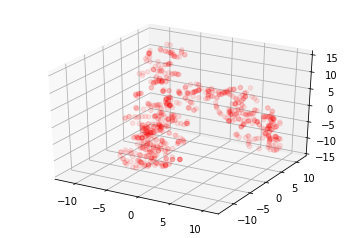

In [118]:
plt.title("Patients with strokes")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(strokes_embeddings[:, 0], strokes_embeddings[:, 1],strokes_embeddings[:, 2], c="red", alpha=0.1)
plt.show()

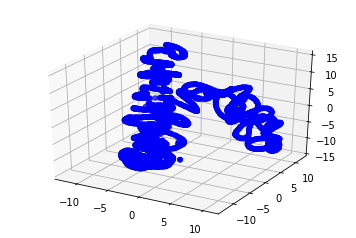

In [190]:
plt.title("Patients without stroke")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(D_NS[:, 0], D_NS[:, 1],D_NS[:, 2], c="blue", alpha=0.1)
plt.show()

In [ ]:
#Classification
#XGBOOST

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [10]:
# Dataset created from initial Matrix: X=observations, Y=target

In [11]:
X_ = DS_modified
Y_ = strokes[6]

As we previously described, the datset is particularly imbalanced.
One way to fight this issue is to generate new samples in the classes which are under-represented. 
The most naive strategy is to generate new samples by randomly sampling with replacement the current available sample.
There are different methods which interpolate  around datapoint and create new obbservations rather tahn duplicating them.

In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_, Y_)

In [14]:
X_resampled.shape, y_resampled.shape

((85234, 22), (85234,))

In [15]:
# Classifier Definition


Boosting is an ensemble technique where new models are added to correct the errors made by existing models. 
Models are added sequentially until no further improvements can be made. 
A popular example is the AdaBoost algorithm that weights data points that are hard to predict.

Gradient boosting is an approach where new models are created to predict the residuals 
or errors of prior models and then added together to make the final prediction. 
It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss 
when adding new models.

This approach supports both regression and classification predictive modeling problems.

Boosting is a method of converting weak learners into strong learners. 
In boosting, each new tree is a fit on a modified version of the original data set. 
The gradient boosting algorithm (gbm) can be most easily explained by first introducing a former boosting algorithm: AdaBoost.
The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. 
After evaluating the first tree, we increase the weights of observations that are difficult to classify (where there were errors) 
and lower the weights for those that are easy to classify (correctly classified). 
The second tree is therefore grown on this weighted data. 


Here (in the case of gbm), the idea is to improve upon the predictions of the first tree. 
Our new model is therefore Tree 1 + Tree 2. We then, compute the classification error from this new 2-tree ensemble 
model and grow a third tree to predict the revised residuals. 
We repeat this process for a specified number of iterations. 
Subsequent trees help us to classify observations that are not well classified by the previous trees. 
Predictions of the final ensemble model is therefore the weighted sum of the predictions made by the previous tree models.

In [34]:
xgb1 = XGBClassifier(
    learning_rate =0.1, 
    n_estimators=1000,
    max_depth=5, 
    min_child_weight=1, 
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic', 
    nthread=4,
    scale_pos_weight=54,
    seed=27)

In [35]:
# We must use the stratify parameter to make sure that both our test set and train set have the same distribution
# For example, if variable y is a binary categorical variable with values 0 and 1 and 
# there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split 
# has 25% of 0's and 75% of 1's.
# We finally define a test-train split of 80%-20%

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.20, 
                                                    stratify= y_resampled,
                                                    random_state=42)

In [38]:
xgb1.fit(X_train,  y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=54, seed=27,
       silent=True, subsample=0.8)

In [39]:
y_pred =xgb1.predict(X_test)

Accuracy: 96.25%


In [ ]:
# Metrics

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
rec = str(metrics.recall_score(y_pred,y_test)
pred_score = str(metrics.precision_score(y_pred,y_test))

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("the average recall (=sensitivity OR true positive rate) is  {0}".format(rec)))
print("the average precision (=predictive precision power) is  {0}".format(pred_score))

In [ ]:
to evaluate a model that is not a regressor, it can be more informative to evaluate:
specificity, sensitivity and plot the ROC curve

In [40]:
full_pipeline = Pipeline([
    ('classify', XGBClassifier())
    ])


In [41]:
pg =[{'classify': [XGBClassifier()],
      'classify__scale_pos_weight': [54.0],
      'classify__n_estimators':[500,1000,1500],
      'classify__max_depth':range(1,10,1),
      'classify__nthread':[8],
      'classify__min_child_weight':range(1,6,2)
     }]

In [42]:
# GridSearch
# This grid search evaluates the model with various settings
# We choose the model which has the best performance

In [43]:
full_pipeline.fit(X_train,y_train)
grid_search = GridSearchCV(full_pipeline, param_grid=pg, cv=3, verbose=10, n_jobs=4, scoring = 'recall')
#print(grid_search)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   28.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   49.8s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 10.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 13.1min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 16.5min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 20.7min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 26.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 33.3min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 41.5min
[Parallel(

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('classify', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'classify__n_estimators': [500, 1000, 1500], 'classify__nthread': [8], 'classify__scale_pos_weight': [54.0], 'classify__min_child_weight': [1, 3, 5], 'classify': [XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, ..., seed=None,
       silent=True, subsample=1)], 'classify__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', re

In [44]:
# We only keep the model of interest (that's to say with the best performance)

In [45]:

print("Best estimator found:")
print(grid_search.best_estimator_)

print("Best score:")
print(grid_search.best_score_)

print("Best parameters found:")
print(grid_search.best_params_)


y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

Best estimator found:
Pipeline(memory=None,
     steps=[('classify', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=8, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=54.0, seed=None,
       silent=True, subsample=1))])
Best score:
1.0
Best parameters found:
{'classify__n_estimators': 500, 'classify__nthread': 8, 'classify__scale_pos_weight': 54.0, 'classify__min_child_weight': 1, 'classify': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=8, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=54.0, seed=None,
       si

In [ ]:
#Best Model

In [23]:
xgb1 = XGBClassifier(
    learning_rate =0.1, 
    n_estimators=1500,
    max_depth=9, 
    min_child_weight=1, 
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic', 
    nthread=4,
    scale_pos_weight=54,
    seed=27)

In [24]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=54, seed=27,
       silent=True, subsample=0.8)

In [25]:
y_pred =xgb1.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.44%


In [33]:
from sklearn import metrics
print(metrics.recall_score(y_pred,y_test))
print(metrics.precision_score(y_pred,y_test))

0.9889765606869343
1.0


In [30]:
fpr_grd, tpr_grd, _ = metrics.roc_curve(y_test, y_pred)

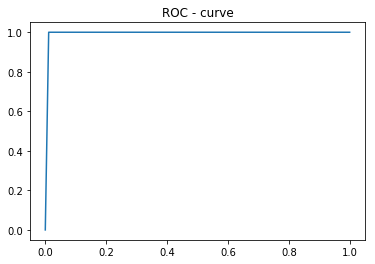

In [32]:
plt.title("ROC - curve")
plt.plot(fpr_grd, tpr_grd)
plt.show()

GridSearch CV search the best parameters based on what we want to optimise.
In a case of a medical application -for diagniostic  we want to make sure to detect 
ALL the individuals who are susceptible to have a stroke.